<a href="https://colab.research.google.com/github/RoshanKumar854/ML-Projects/blob/main/ML_Practice_Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

In [2]:
import numpy as np
x=2*np.random.randn(100,1)
y=4+3*x+np.random.randn(100,1)

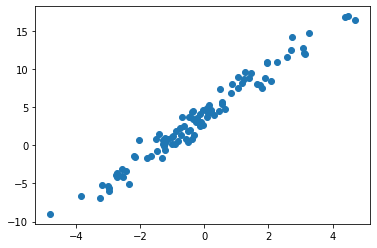

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [4]:
x_b=np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [5]:
theta_best

array([[3.97481127],
       [2.95287927]])

In [6]:
x_new = np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new]
y_predict=x_new_b.dot(theta_best)
y_predict

array([[3.97481127],
       [9.88056981]])

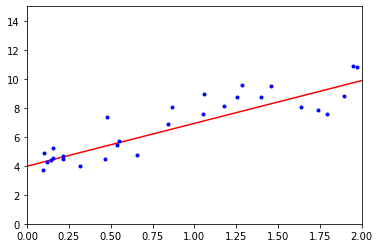

In [7]:
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.97481127]), array([[2.95287927]]))

In [9]:
lin_reg.predict(x_new)

array([[3.97481127],
       [9.88056981]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b,y, rcond=1e-6)
theta_best_svd

array([[3.97481127],
       [2.95287927]])

In [11]:
np.linalg.pinv(x_b).dot(y)

array([[3.97481127],
       [2.95287927]])

#Gradient Descent

In [12]:
eta = 0.1
n_iterations = 1000
m = 1000

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m*x_b.T.dot(x_b.dot(theta)-y)
  theta = theta - eta*gradients


In [13]:
gradients

array([[-1.76814565e-09],
       [-1.34427516e-10]])

In [14]:
n_epochs = 50
t0, t1 = 5,50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = x_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta -eta*gradients

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3,penalty=None, eta0=0.1)
sgd_reg.fit(x,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_ 

(array([3.9870889]), array([2.82144703]))

#Polynomial Regression

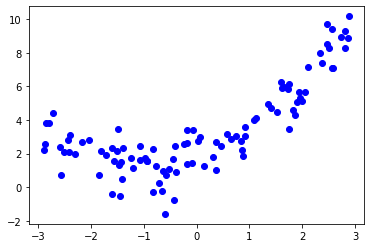

In [17]:
m = 100
x = 6*np.random.rand(m,1)-3
y = 0.5*x**2+x+2+np.random.randn(m,1)

plt.scatter(x,y,color = 'blue')

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
x_poly = poly_features.fit_transform(x)
x[0]

array([-0.60271715])

In [19]:
x_poly[0]

array([-0.60271715,  0.36326797])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.77826766]), array([[1.07422547, 0.55287968]]))

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))



In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([('poly_features', PolynomialFeatures(degree=10,include_bias=False)),('lin_reg',LinearRegression()),])

plot_learning_curves(polynomial_regression,x,y)

#Regularized Linear Model

In [23]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[5.07284322]])

In [24]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(x,y.ravel())
sgd_reg.predict([[1.5]])

array([5.05689689])

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([5.02730463])

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([5.02459484])

#Logistic Regression

In [27]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [28]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [29]:
X = iris['data'][:,3:]
y = (iris['target']==2).astype(np.int)

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

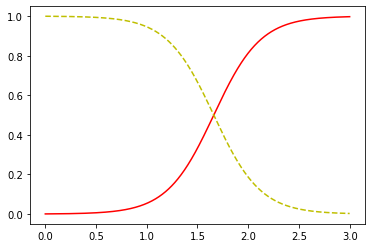

In [31]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'r-', label='Iris Virginica')
plt.plot(X_new, y_proba[:, 0], 'y--', label='Not Iris Virginica')

In [32]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

#Softmax Regression

In [34]:
X = iris['data'][:, (2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [35]:
softmax_reg.predict([[5,2]])


array([2])

In [36]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])